![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción producción de toneladas de café diaria**

**Series de tiempo** <br>

Profesor: Wilson Sandoval Rodriguez <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

![Tarea](https://file.notion.so/f/f/f34f306e-d9b5-494b-b818-5da09ff1677a/8ec70526-7346-4038-af12-aecbfc968fd2/image.png?table=block&id=111552c0-2d01-80ed-b486-de7d3fff6db1&spaceId=f34f306e-d9b5-494b-b818-5da09ff1677a&expirationTimestamp=1727827200000&signature=FRTD8cTXDHdItIfpAcorwW5HuawMCywhFPWqJVqDR1o&downloadName=image.png)

# Preliminares

Librerias a utilizar:

```python
# Procesamiento de datos
import pandas as pd
import numpy as np

# obtener dados
import yfinance as yf

# Modelo Prophet para pronóstico de series temporales.
from prophet import Prophet

# Visualizacion
import seaborn as sns
import matplotlib.pyplot as plt

# Multi-processing
from multiprocessing import Pool, cpu_count

# Spark
from pyspark.sql.types import *
from pyspark.sql.functions import pandas_udf, PandasUDFType

# progreso
from tqdm import tqdm

# Tiempo
from time import time

```

La data a utilizar esta en el siguiente enlace [Cafe.xlsx](https://github.com/Wilsonsr/Series-de-Tiempo/blob/main/bases/cafe.xlsx)

In [2]:
# Cargar el archivo utils.py, este archivo contiene las librerias necesarias y algunos modulos a utilizar en el proceso

from utils import *

/home/danielcardenas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Cargar el DataSet Cafe.xlsx

url = ("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/cafe.xlsx") # Url del archivo

df = cargar_dataset(url,sheet_name='Hoja1') # Modulo para cargue de archivos .csv y .xlsx

df.head(10) # Mostrar la información del df

Archivo Excel cargado exitosamente: 295 filas, 2 columnas


,fecha,Toneladas
0,2000-01-01,658.0
1,2000-02-01,740.0
2,2000-03-01,592.0
3,2000-04-01,1055.0
4,2000-05-01,1114.0
5,2000-06-01,1092.0
6,2000-07-01,811.0
7,2000-08-01,436.0
8,2000-09-01,501.0
9,2000-10-01,940.0


In [4]:
#Validar el tipo de datos de cada columna y si tiene datos nulos

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      295 non-null    datetime64[ns]
 1   Toneladas  295 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [5]:
# Ajustar el df para que sea una serie de tiempo

df.index = df['fecha'] # Definir la columna fecha como index
df.drop(columns=['fecha'],inplace=True) # Eliminar la columna fecha
df

,Toneladas
fecha,
2000-01-01,658.000000
2000-02-01,740.000000
2000-03-01,592.000000
2000-04-01,1055.000000
2000-05-01,1114.000000
...,...
2024-03-01,865.532563
2024-04-01,742.000000
2024-05-01,1120.000000


# Entendimiento de los datos

- Graficar la serie de tiempo original
- Descomponer la serie de tiempo original

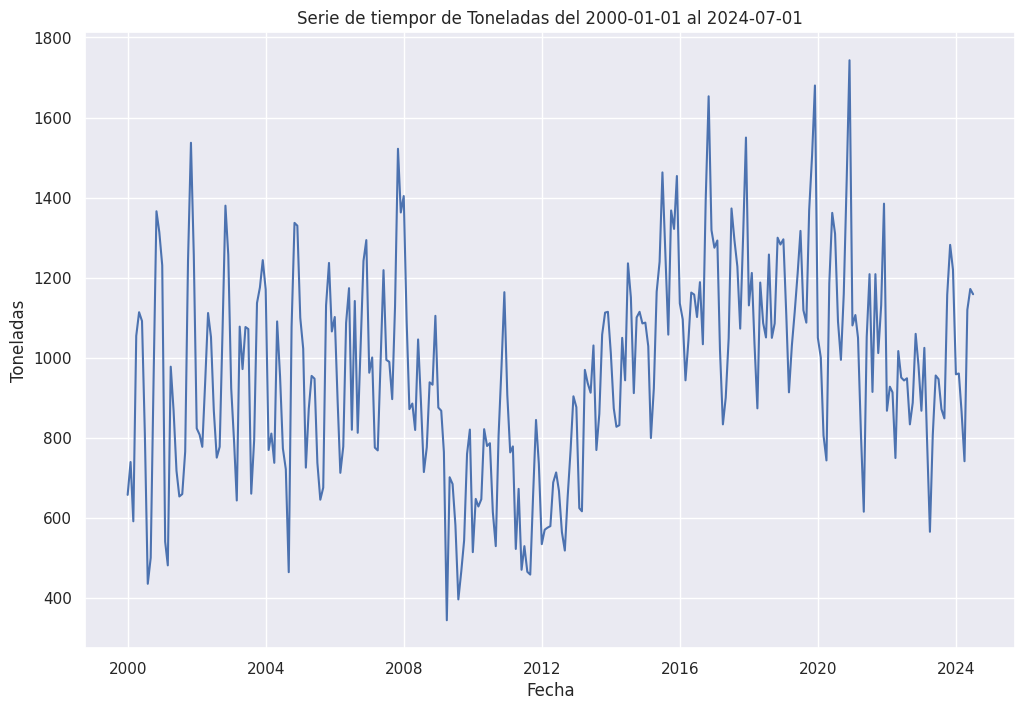

In [6]:
serie_de_tiempo(df,'Toneladas')

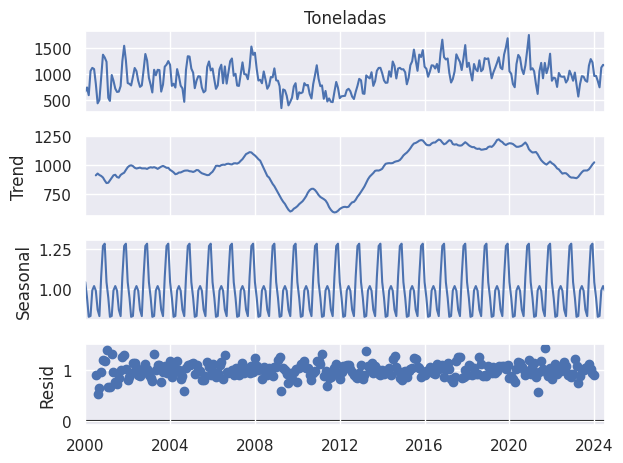

In [7]:
Serie_decompuesta = seasonal_decompose (df['Toneladas'],model = 'multiplicative')
grafico1 = Serie_decompuesta.plot()

# Modelos SARIMA

Aplicar la metodologia Box Jenkins 

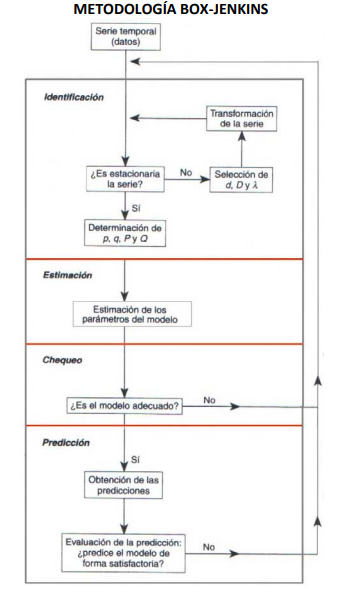


## Identificación

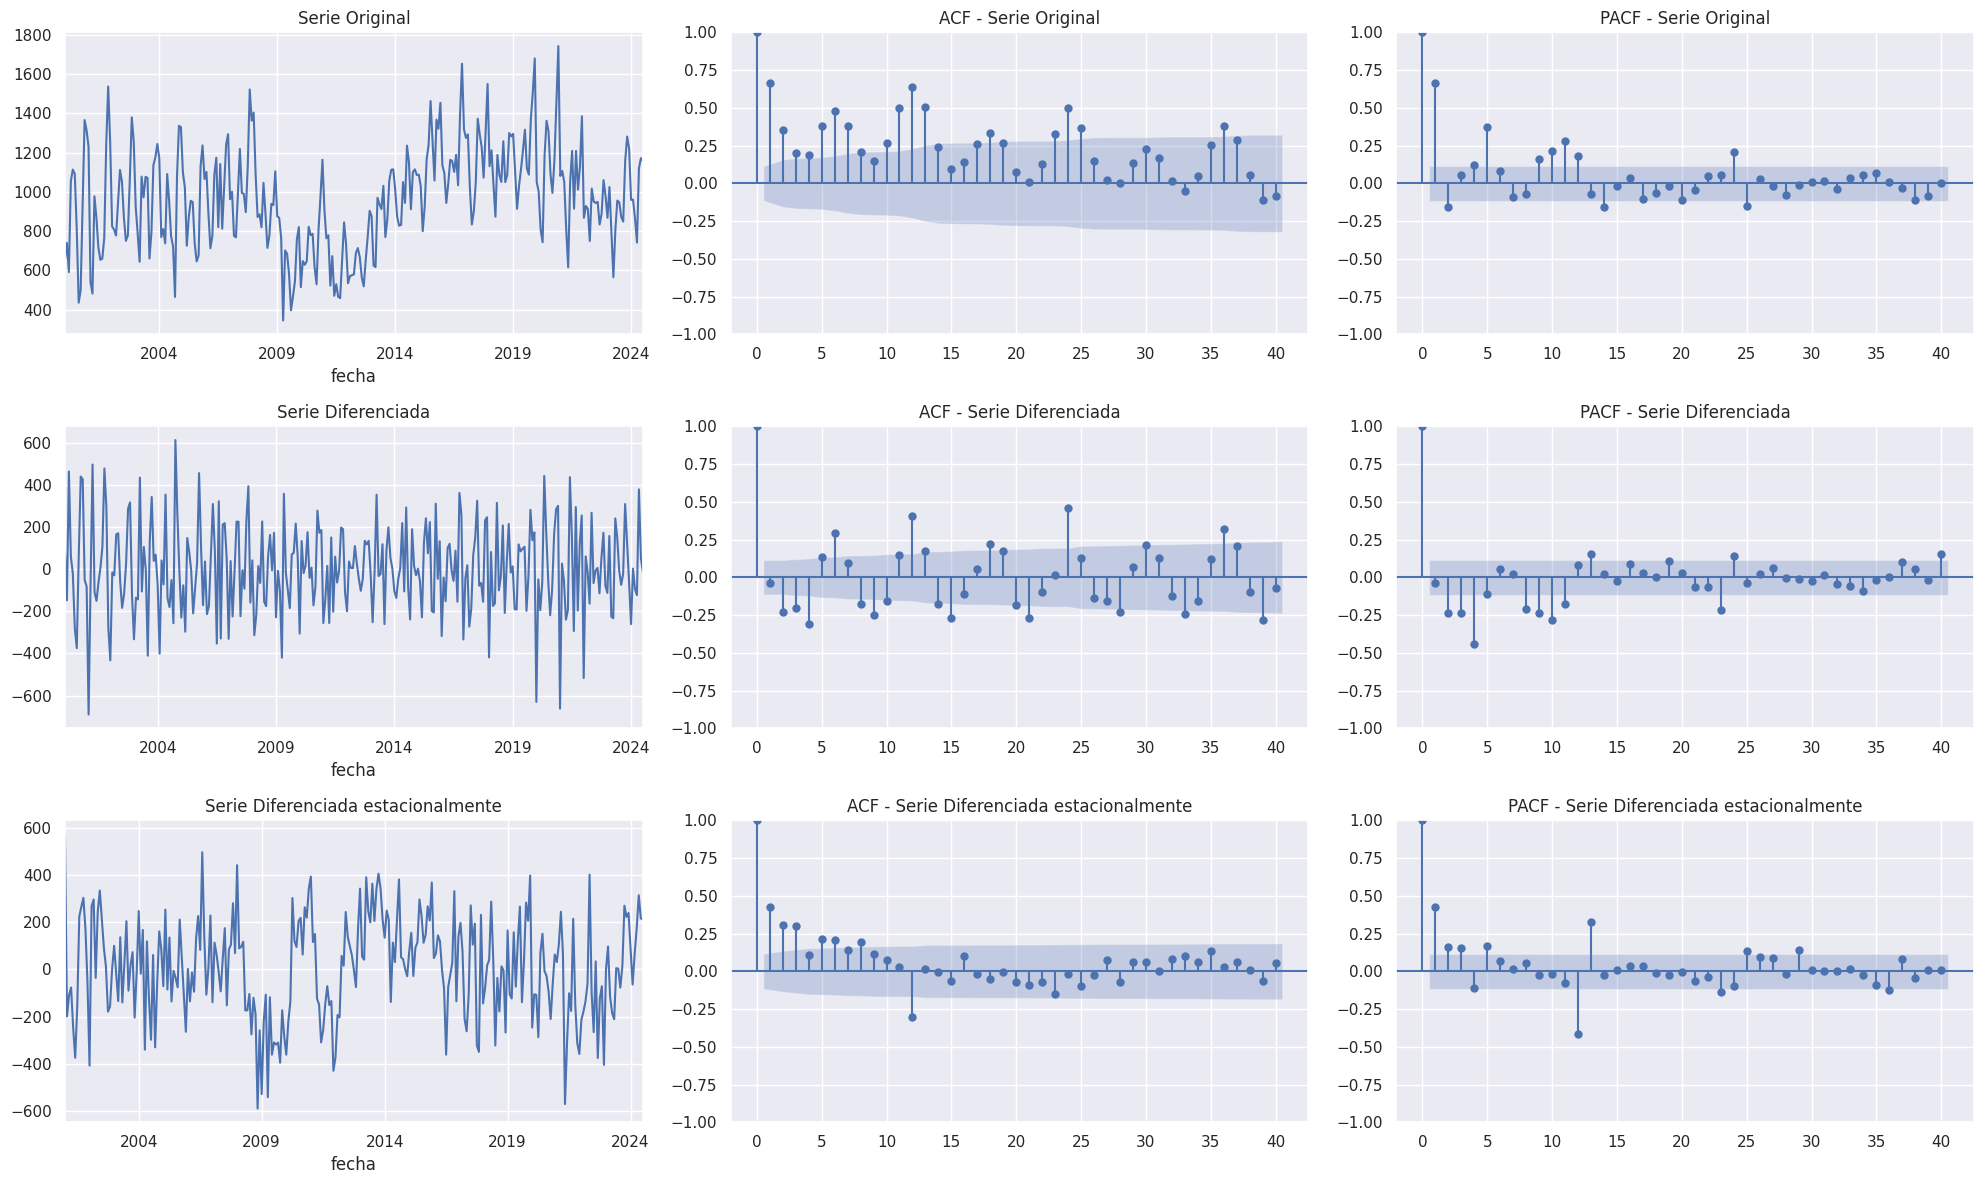

In [8]:
differenced_series = df['Toneladas'].diff().dropna()
seasonal_differenced_series = df['Toneladas'].diff(12).dropna()

plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
df['Toneladas'].plot(ax=plt.gca())
plt.title('Serie Original')

# ACF de la serie original
plt.subplot(3,3,2)
plot_acf(df['Toneladas'], lags=40, ax=plt.gca())
plt.title('ACF - Serie Original')

# PACF de la serie original
plt.subplot(3,3,3)
plot_pacf(df['Toneladas'], lags=40, ax=plt.gca())
plt.title('PACF - Serie Original')


plt.subplot (3,3,4)
differenced_series.plot(ax=plt.gca())
plt.title('Serie Diferenciada')

# ACF de la serie diferenciada
plt.subplot(3,3,5)
plot_acf(differenced_series, lags=40, ax=plt.gca())
plt.title('ACF - Serie Diferenciada')

# PACF de la serie diferenciada
plt.subplot(3,3,6)
plot_pacf(differenced_series, lags=40, ax=plt.gca())
plt.title('PACF - Serie Diferenciada')

plt.subplot (3,3,7)
seasonal_differenced_series.plot(ax=plt.gca())
plt.title('Serie Diferenciada estacionalmente')

# ACF de la serie diferenciada
plt.subplot(3,3,8)
plot_acf(seasonal_differenced_series, lags=40, ax=plt.gca())
plt.title('ACF - Serie Diferenciada estacionalmente')

# PACF de la serie diferenciada
plt.subplot(3,3,9)
plot_pacf(seasonal_differenced_series, lags=40, ax=plt.gca())
plt.title('PACF - Serie Diferenciada estacionalmente')

plt.tight_layout()
plt.show()